In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7)
%matplotlib inline

import keras
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from keras.applications import resnet50, densenet
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

/Users/roblee/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
# Load Data

data = pd.read_csv('train.csv')

In [79]:
data['positive'] = data.Emotion.apply(lambda x: int(x == 3))
data['image'] = data.Pixels.apply(lambda x: np.array([int(number) for number in x.split(' ')]).reshape((48,48)))

In [80]:
data.groupby('positive').count()

,Emotion,Pixels,image
positive,,,
0,3420,3420,3420
1,758,758,758


In [81]:
x_train, x_test, y_train, y_test = train_test_split(data.image, data.positive, test_size=0.3)

In [82]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(2924,) (2924,)
(1254,) (1254,)


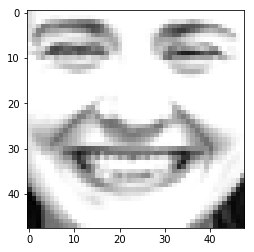

In [83]:
from matplotlib import pyplot as plt, cm
plt.imshow(data.image[0], cmap=cm.gray, interpolation='nearest')


In [89]:
batch_size = 64
num_classes = 2
epochs = 20

# input image dimensions
img_rows, img_cols = 48, 48

In [85]:
data.shape

(4178, 4)

In [86]:
x_train = np.array(list(x_train))
x_test = np.array(list(x_test))
y_train = np.array(list(y_train))
y_test = np.array(list(y_test))

In [87]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (2924, 48, 48, 1)
2924 train samples
1254 test samples


IndexError: index 1 is out of bounds for axis 1 with size 1

In [91]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [92]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [93]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3965056   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [94]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 2924 samples, validate on 1254 samples
Epoch 1/20
2924/2924 [==============================] - 16s 5ms/step - loss: 0.5207 - acc: 0.8102 - val_loss: 0.3916 - val_acc: 0.8341
Epoch 2/20
2924/2924 [==============================] - 15s 5ms/step - loss: 0.3685 - acc: 0.8246 - val_loss: 0.2268 - val_acc: 0.9306
Epoch 3/20
2924/2924 [==============================] - 15s 5ms/step - loss: 0.2635 - acc: 0.8919 - val_loss: 0.1594 - val_acc: 0.9434
Epoch 4/20
2924/2924 [==============================] - 15s 5ms/step - loss: 0.1633 - acc: 0.9395 - val_loss: 0.1345 - val_acc: 0.9537
Epoch 5/20
2924/2924 [==============================] - 15s 5ms/step - loss: 0.1376 - acc: 0.9501 - val_loss: 0.1159 - val_acc: 0.9585
Epoch 6/20
2924/2924 [==============================] - 15s 5ms/step - loss: 0.1144 - acc: 0.9562 - val_loss: 0.1433 - val_acc: 0.9482
Epoch 7/20
2924/2924 [==============================] - 15s 5ms/step - loss: 0.1035 - acc: 0.9661 - val_loss: 0.1081 - val_acc: 0.9633
Epoch 8

Text(0.5,1,'Loss Curves')

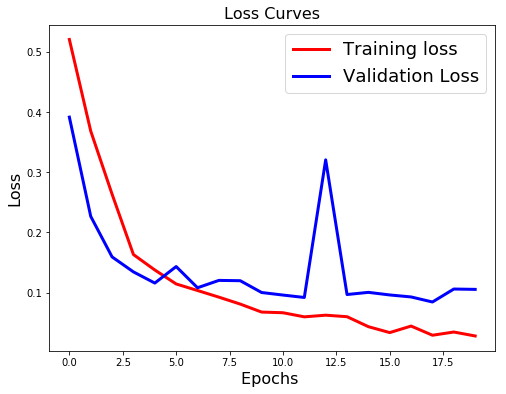

In [95]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [96]:
#save model to disk
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('model.h5') 